# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 6.1 MB/s eta 0:00:00


In [3]:
titanic=pd.read_csv('../input/spaceship-titanic/train.csv')
titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Lets focus on Continuous varibles

In [4]:
# all the numerical features are continuous in nature here
num_features=titanic.describe().columns.tolist()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 titanic[num_features], titanic["Transported"], test_size=0.3,
 random_state=0)

In [6]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
7289,64.0,19.0,261.0,208.0,0.0,214.0
2709,24.0,NaN,2.0,25.0,NaN,707.0
6803,44.0,0.0,0.0,16.0,72.0,4304.0
3731,34.0,0.0,847.0,14.0,0.0,0.0
6333,13.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#filling null values using median of train set

X_train.fillna(X_train.median(),inplace=True)
X_test.fillna(X_train.median(),inplace=True)

In [8]:
X_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3601,16.0,0.0,0.0,623.0,40.0,209.0
6057,2.0,0.0,0.0,0.0,0.0,0.0
2797,31.0,517.0,1.0,301.0,60.0,4.0
7110,14.0,653.0,0.0,4.0,0.0,0.0
8579,30.0,0.0,0.0,0.0,0.0,0.0


# Discretization
**Discretization, or binning, is the process of transforming continuous variables into discrete
variables by creating a set of contiguous intervals, also called bins, that span the range of
the variable values. Discretization is used to change the distribution of skewed variables
and to minimize the influence of outliers, and hence improve the performance of some
machine learning models.**

## Types of Discretization
 * **UnSupervised** --> This technique does not uses any information other than the varible own distribution to create bins
 * **Supervised** -- > this tehcnique uses the target information  to create bins

# Unsupervised Binning

# 1. Equal width Binning
the variable values are sorted into intervals of the same
width. The number of intervals is decided arbitrarily and the width is determined by the
range of values of the variable and the number of bins to create, so for the variable X, the
interval width is given as follows:
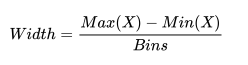

For example, if the values of the variable vary between 0 and 100, we can create five bins
like this: width = (100-0) / 5 = 20; the bins will be 0-20, 20-40, 40-60, 80-100.

# Normal way

In [9]:
# Lets Divide Age into 10 Bins
X_train_copy=X_train.copy()
X_test_copy=X_test.copy()
# Applying the formula shown above
maximum=X_train_copy['Age'].max()
minimum=X_test_copy['Age'].min()
roomRange= maximum - minimum 
width = int(roomRange/10)
width

#inerval width is shown in output

7

In [10]:
# lets create new min and max values for our interval with rounded min and max values of RoomService
min_value = int(np.floor(minimum))
max_value = int(np.ceil( maximum))
print(" min-->",min_value,"\n","max-->",max_value,"\n","inerval_width-->",width)

 min--> 0 
 max--> 79 
 inerval_width--> 7


## intervals

In [11]:
intervals = [i for i in range(min_value, max_value + width,width)]
intervals

[0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84]

In [12]:
#To divide a pandas Series into intervals, we will use pandas' cut() method,
X_train_copy['Age_Bins'] = pd.cut(x=X_train_copy['Age'], bins=intervals,
include_lowest=True)
X_test_copy['Age_Bins'] = pd.cut(x=X_test_copy['Age'], bins=intervals,
include_lowest=True)

In [13]:
X_train_copy.head()
#In equal-width discretization, there is usually a different number of observations per interval.

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_Bins
7289,64.0,19.0,261.0,208.0,0.0,214.0,"(63.0, 70.0]"
2709,24.0,0.0,2.0,25.0,0.0,707.0,"(21.0, 28.0]"
6803,44.0,0.0,0.0,16.0,72.0,4304.0,"(42.0, 49.0]"
3731,34.0,0.0,847.0,14.0,0.0,0.0,"(28.0, 35.0]"
6333,13.0,0.0,0.0,0.0,0.0,0.0,"(7.0, 14.0]"


## If the variable distribution in the train and test sets are similar, we should expect a similar proportion of observations across the Age_Bins intervals in the train and test sets.


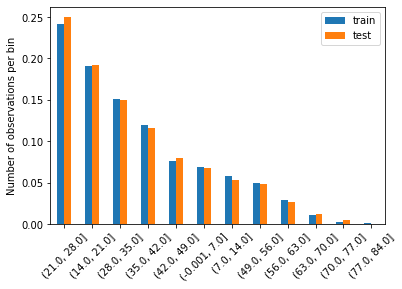

In [14]:
t1 = X_train_copy['Age_Bins'].value_counts() / len(X_train)
t2 = X_test_copy['Age_Bins'].value_counts() / len(X_test)
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin');

# Better Way

In [15]:
X_train_copy=X_train.copy()
X_test_copy=X_test.copy()

In [16]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [17]:
widthDiscretiser=EqualWidthDiscretiser(bins=10,variables=["Age"])
#to know more about paramaters of this class 


[Check the link](https://feature-engine.readthedocs.io/en/latest/user_guide/discretisation/EqualWidthDiscretiser.html)

In [18]:
widthDiscretiser.fit(X_train_copy)
widthDiscretiser.binner_dict_

{'Age': [-inf,
  7.9,
  15.8,
  23.700000000000003,
  31.6,
  39.5,
  47.400000000000006,
  55.300000000000004,
  63.2,
  71.10000000000001,
  inf]}

## here the Number represents the bins (in age column)
Example - 1 --> first bin, 5--> fift bin

In [19]:
X_train_copy=widthDiscretiser.transform(X_train_copy)
X_test_copy=widthDiscretiser.transform(X_test_copy)
X_test_copy.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3601,2,0.0,0.0,623.0,40.0,209.0
6057,0,0.0,0.0,0.0,0.0,0.0
2797,3,517.0,1.0,301.0,60.0,4.0
7110,1,653.0,0.0,4.0,0.0,0.0
8579,3,0.0,0.0,0.0,0.0,0.0


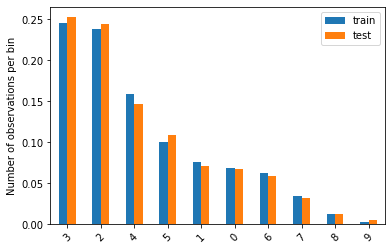

In [20]:
t1 = X_train_copy['Age'].value_counts() / len(X_train_copy)
t2 = X_test_copy['Age'].value_counts() / len(X_test_copy)
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin');

# Distribution

In [21]:
def make_plot(X,X_copy,variable):
    plt.figure(figsize=(12,6))
    sns.countplot(x=X[variable])
    plt.title("Before Binning ")
    plt.show()
    plt.figure(figsize=(12,6))
    sns.countplot(x=X_copy[variable])
    plt.title("After Binning ")
    plt.show()
    


## train

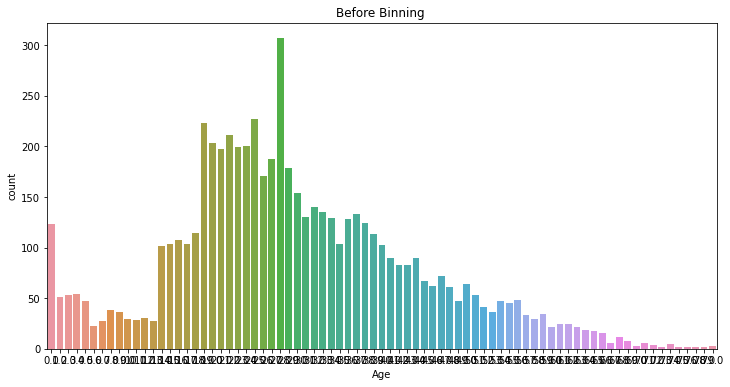

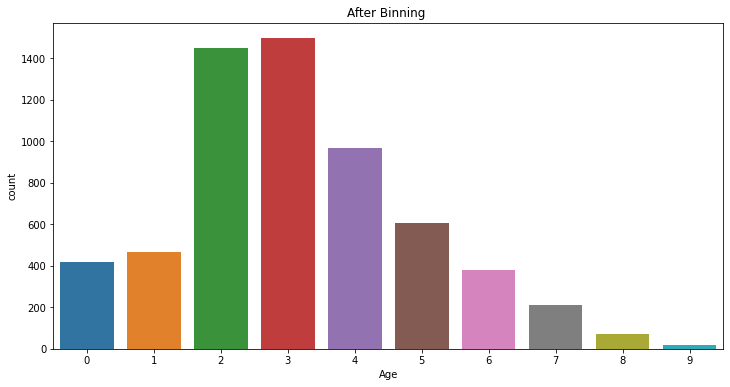

In [22]:
make_plot(X_train,X_train_copy,"Age")

## test

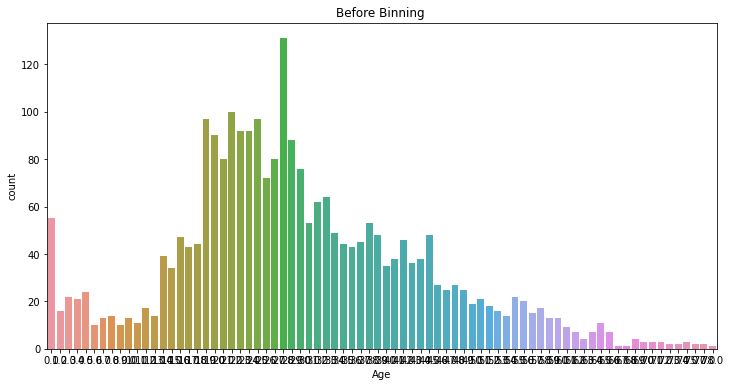

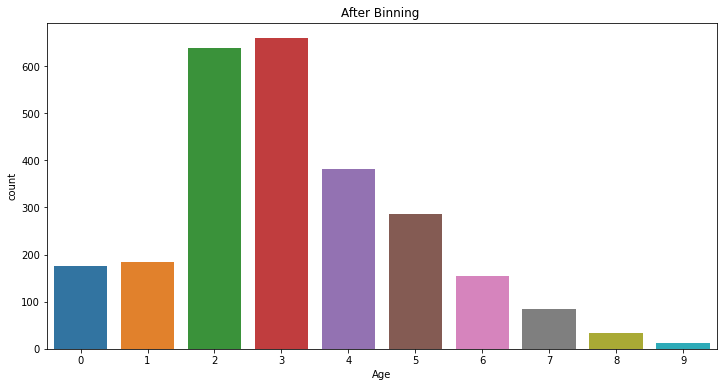

In [23]:
make_plot(X_test,X_test_copy,"Age")

In [24]:
# checking for outliers
def box_plot(X,X_copy,variable):
    plt.subplot(1,2,1)
    X[variable].plot.box(title="Before discretization")
    plt.subplot(1,2,2)
    X_copy[variable].plot.box(title="After discretization");


# oultliers

## train

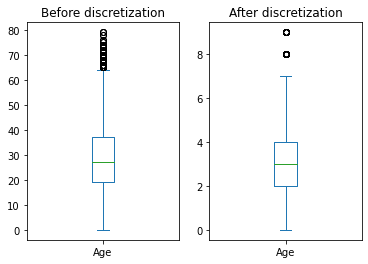

In [25]:
box_plot(X_train,X_train_copy,"Age")

## test

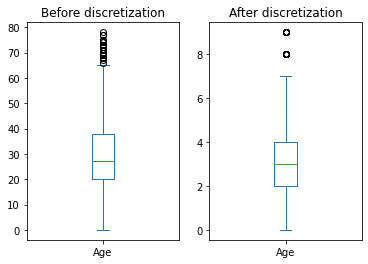

In [26]:
box_plot(X_test,X_test_copy,"Age")

# Equal Frequency Binning
* Equal-frequency discretization divides the values of the variable into intervals that carry
the same proportion of observations. The interval width is determined by quantiles, and
therefore different intervals may have different widths
* it consists of dividing the continuous variable into N quantiles,
with N to be defined by the user


## Normal Way 

In [27]:
X_train_copy=X_train.copy()
X_test_copy=X_test.copy()

In [28]:
X_train_copy['Age_Bins'], intervals = pd.qcut(X_train['Age'], 10,
labels=None, retbins=True)

X_test_copy['Age_Bins'] = pd.cut(x = X_test_copy['Age'], bins=intervals)


In [29]:
## see how the df b/w two intervals is not same 

In [30]:
print(intervals)

[ 0. 13. 18. 21. 24. 27. 30. 35. 40. 49. 79.]


In [31]:
X_test_copy.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_Bins
3601,16.0,0.0,0.0,623.0,40.0,209.0,"(13.0, 18.0]"
6057,2.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 13.0]"
2797,31.0,517.0,1.0,301.0,60.0,4.0,"(30.0, 35.0]"
7110,14.0,653.0,0.0,4.0,0.0,0.0,"(13.0, 18.0]"
8579,30.0,0.0,0.0,0.0,0.0,0.0,"(27.0, 30.0]"


## Better way

In [32]:
X_train_copy=X_train.copy()
X_test_copy=X_test.copy()

from feature_engine.discretisation import  EqualFrequencyDiscretiser

In [33]:
frqDisc = EqualFrequencyDiscretiser(q=10,variables=["Age"])

In [34]:
frqDisc.fit(X_train_copy)
frqDisc.binner_dict_

{'Age': [-inf, 13.0, 18.0, 21.0, 24.0, 27.0, 30.0, 35.0, 40.0, 49.0, inf]}

In [35]:
X_train_copy=frqDisc.transform(X_train_copy)
X_test_copy=frqDisc.transform(X_test_copy)

In [36]:
# Numbers represent the qantiles here in Age column
X_test_copy.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3601,1,0.0,0.0,623.0,40.0,209.0
6057,0,0.0,0.0,0.0,0.0,0.0
2797,6,517.0,1.0,301.0,60.0,4.0
7110,1,653.0,0.0,4.0,0.0,0.0
8579,5,0.0,0.0,0.0,0.0,0.0


# Distribution

## train

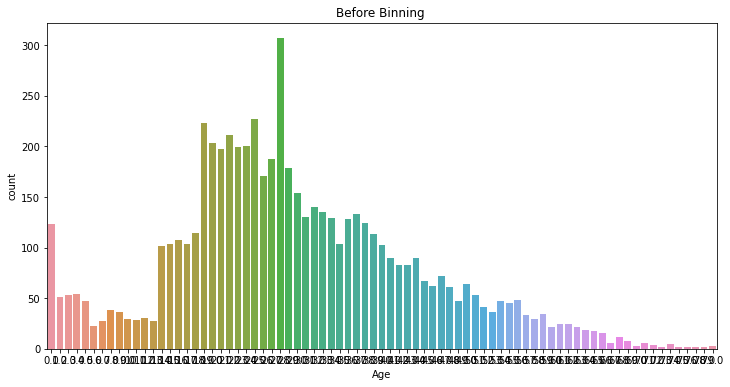

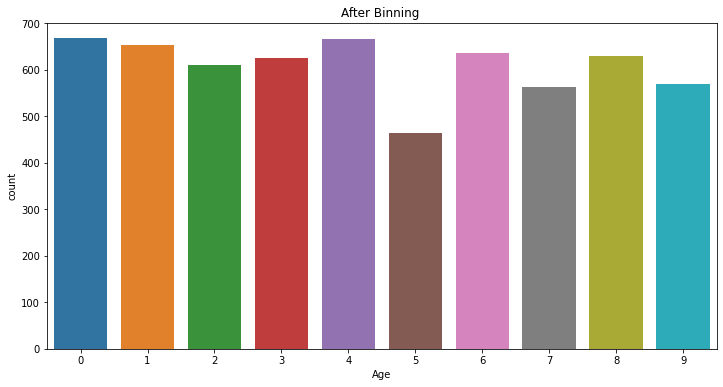

In [37]:
make_plot(X_train,X_train_copy,"Age")

## test 

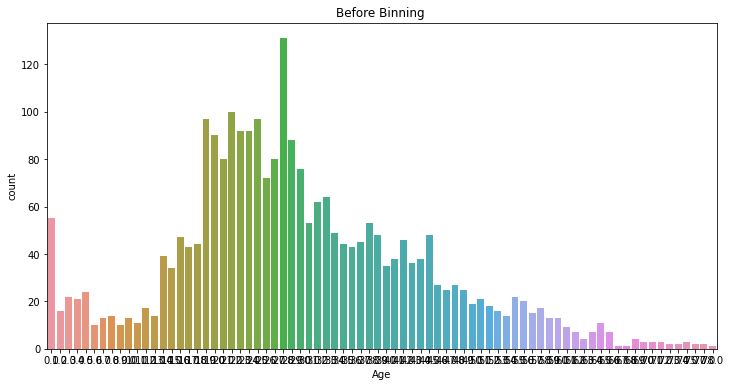

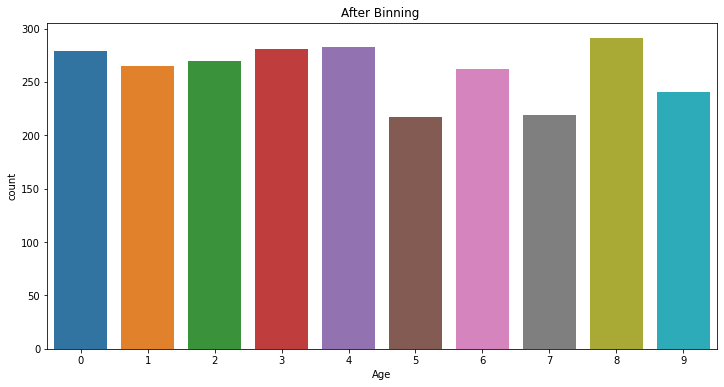

In [38]:
make_plot(X_test,X_test_copy,"Age")

# outliers

## train

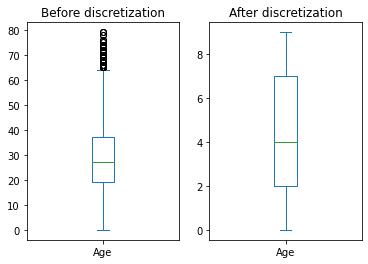

In [39]:
box_plot(X_train,X_train_copy,"Age")

## test

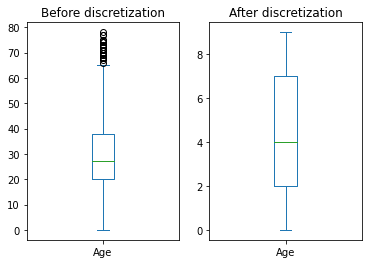

In [40]:
box_plot(X_test,X_test_copy,"Age")